In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#importing data
raw_data = pd.read_csv('walmart_data.csv')
print(raw_data.info())
print(raw_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None
   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942

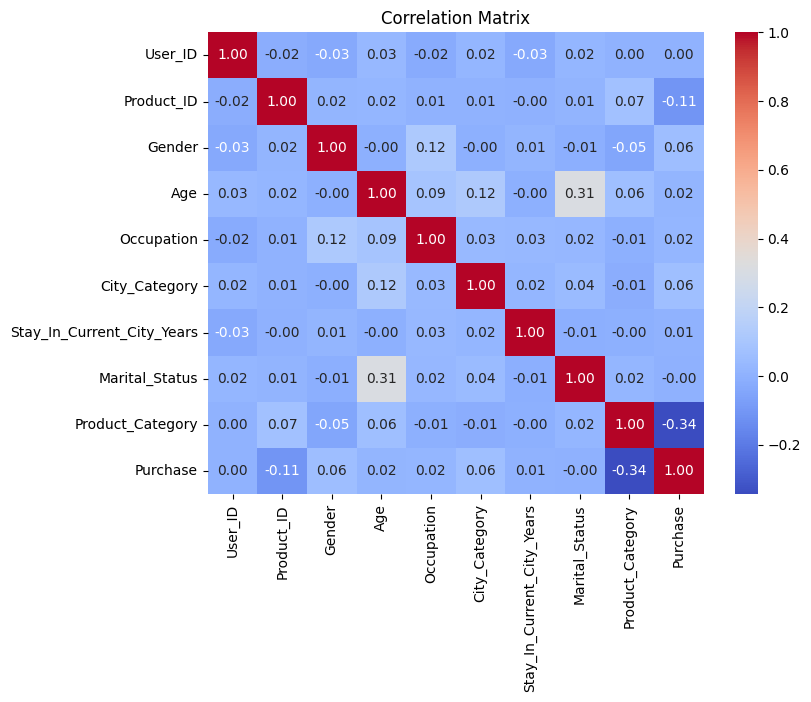

In [10]:
#encode non numerical data
label_encoder = LabelEncoder()
non_numerical_columns = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
encoded_data = raw_data.copy()
for col in non_numerical_columns:
    encoded_data[col] = label_encoder.fit_transform(raw_data[col])

#get correlation matrix
correlation_matrix = encoded_data.corr()

#show correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [11]:
#counting unique values in columns
for column in raw_data.columns:
    print(column, raw_data[column].nunique(), sep = ": ")

#getting exact values in smaller number of unique value columns
small_unique_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
for column in small_unique_columns:
    print(column, raw_data[column].unique(), sep = ": ")

User_ID: 5891
Product_ID: 3631
Gender: 2
Age: 7
Occupation: 21
City_Category: 3
Stay_In_Current_City_Years: 5
Marital_Status: 2
Product_Category: 20
Purchase: 18105
Gender: ['F' 'M']
Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category: ['A' 'C' 'B']
Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']
Marital_Status: [0 1]
Product_Category: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


User_ID : 


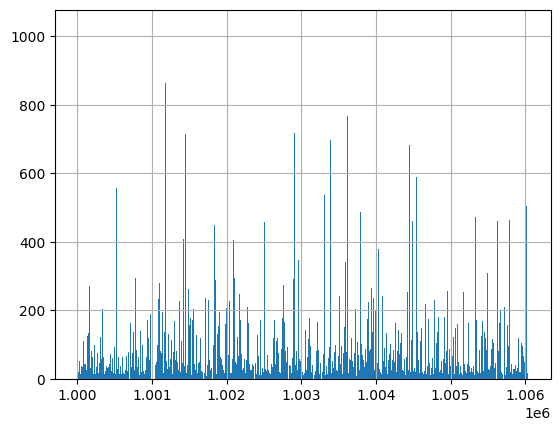

In [20]:
#show distribution

column = "User_ID"
print(column, ": ")
encoded_data[column].hist(bins=encoded_data[column].nunique())
plt.show()

Product_ID : 


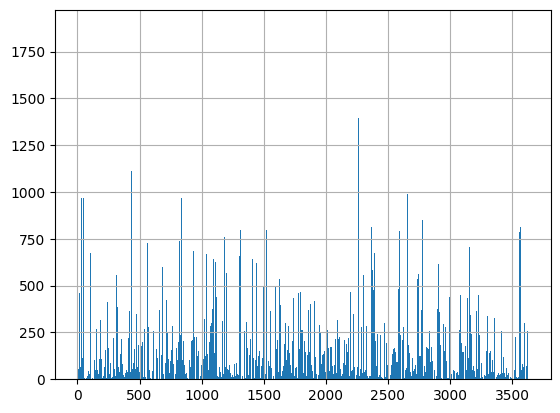

Gender : 


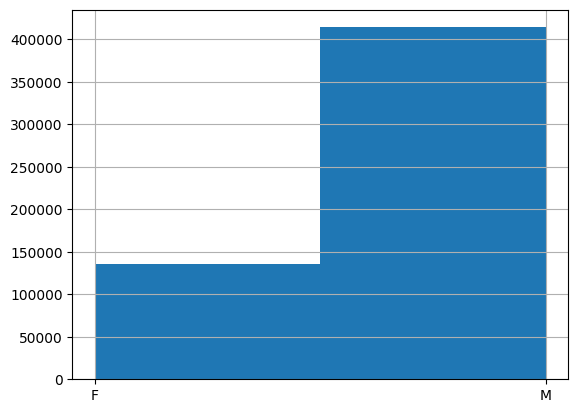

In [22]:
column = "Product_ID"
print(column, ": ")
encoded_data[column].hist(bins=encoded_data[column].nunique())
plt.show()

column = "Gender"
print(column, ": ")
raw_data[column].hist(bins=2)
plt.show()

Age : 


/tmp/ipykernel_1989/3571854473.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  age_series = age_series.replace(replace_values).astype(int).sort_values()


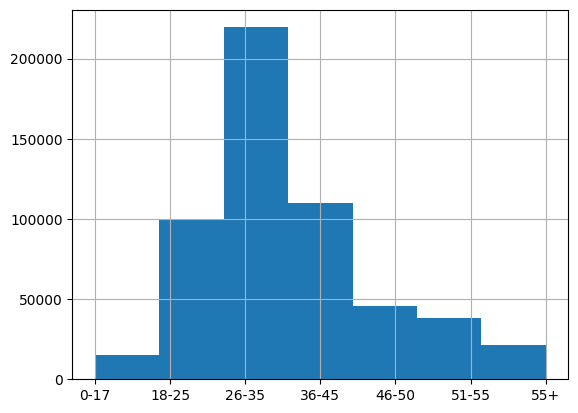

Occupation : 


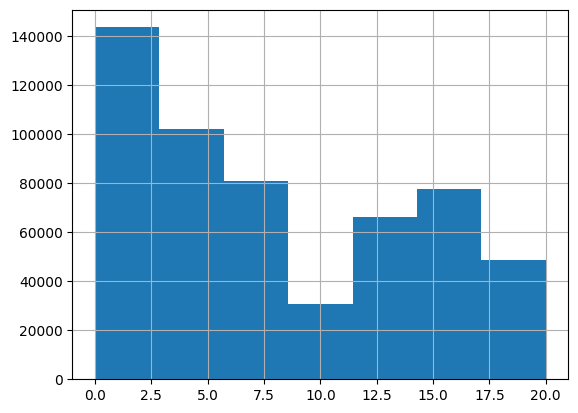

In [42]:
column = "Age"
print(column, ": ")
replace_values = {"0-17": 0, "18-25": 1, "26-35": 2, "36-45": 3, "46-50": 4, "51-55": 5, "55+": 6}
age_series = raw_data[column].copy()
age_series = age_series.replace(replace_values).astype(int).sort_values()
age_series.hist(bins=7)
plt.xticks(ticks=range(len(replace_values)), labels=replace_values.keys())
plt.show()

column = "Occupation"
print(column, ": ")
raw_data[column].hist(bins=7)
plt.show()


City_Category : 


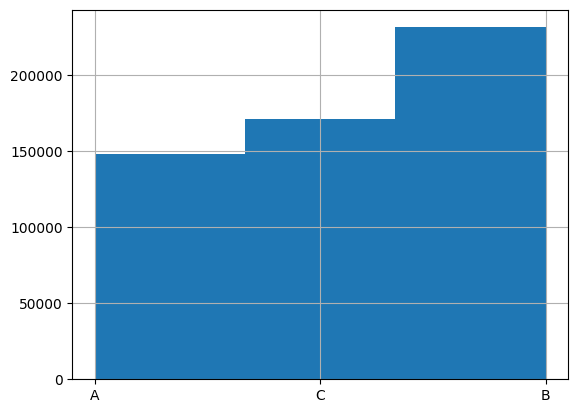

Stay_In_Current_City_Years : 


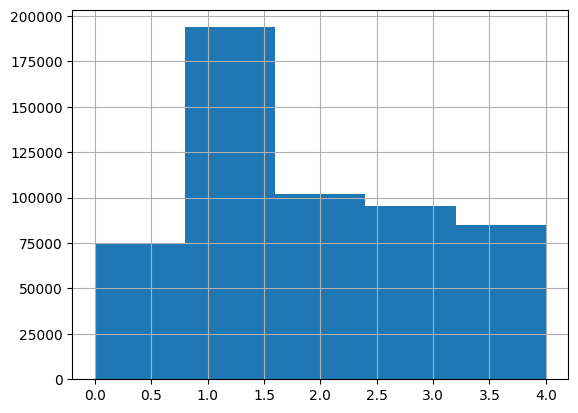

Marital_Status : 


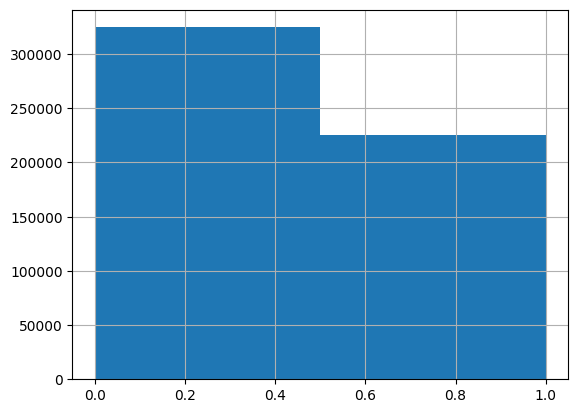

Product_Category : 


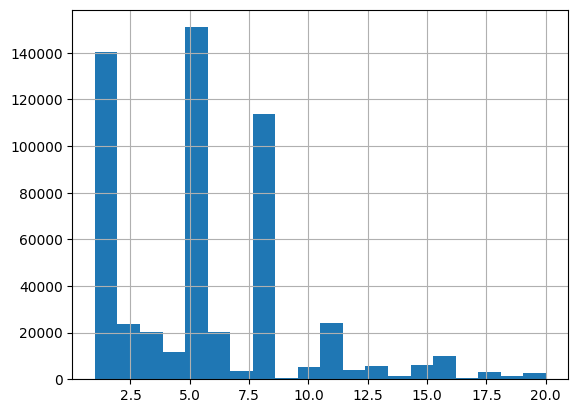

In [40]:
column = "City_Category"
print(column, ": ")
raw_data[column].hist(bins=3)
plt.show()

column = "Stay_In_Current_City_Years"
print(column, ": ")
stay_duration = raw_data[column].copy()
stay_duration.replace({'4+': '4'}, inplace=True)
stay_duration = stay_duration.astype(int)
stay_duration = stay_duration.sort_values()
stay_duration.hist(bins=5)
plt.show()

column = "Marital_Status"
print(column, ": ")
raw_data[column].hist(bins=2)
plt.show()

column = "Product_Category"
print(column, ": ")
raw_data[column].hist(bins=20)
plt.show()





In [ ]:
column = "Purchase"
print(column, ": ")
raw_data[column].hist(bins=18105)
plt.show()